In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Data Cleaning and Analysis</h1>

In [104]:
df = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')
df

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16130 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

Observation -
1. Age has lots of missing values ( can be dropped )
2. Rotten Tamatoes also has lot of missing values (wil be important for analysis purpose so try replacing with mean or median)
3. Directors have few missing values (drop since it is character data)
4. Genres has few missing values (drop because name data)
5. Country also has few missing values (drop name data)
6. Language has few missing values(drop name data or replace with most occured)
7. Runtime has few missing values(replace with mean or median)

In [106]:
df.duplicated().any() 
# No duplicate rows

np.False_

In [107]:
df = df.sort_values('Year')
df = df.reset_index(drop=True)

In [108]:
# sns.boxplot(df['Rotten Tomatoes'])
# No outliers 
# Replace with mean

In [109]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.strip('%')
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].astype(dtype=float)

df['Rotten Tomatoes'] = df['Rotten Tomatoes'].fillna(df['Rotten Tomatoes'].mean())/10
df

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,4467,4468,A Trip to the Moon,1902,all,8.2,10.000000,0,0,1,0,0,Georges Méliès,"Short,Action,Adventure,Comedy,Fantasy,Sci-Fi",France,"None,French",13.0
1,8795,8796,From the Manger to the Cross,1912,7+,5.7,6.542846,0,0,1,0,0,Sidney Olcott,"Biography,Drama",United States,English,60.0
2,9917,9918,Fatty Joins the Force,1913,NaN,5.3,6.542846,0,0,1,0,0,George Nichols,"Comedy,Short",United States,English,12.0
3,10170,10171,The Speed Kings,1913,NaN,5.0,6.542846,0,0,1,0,0,Wilfred Lucas,"Short,Action,Comedy",United States,English,8.0
4,4912,4913,The Birth of a Nation,1915,7+,6.4,9.300000,0,0,1,0,0,D.W. Griffith,"Drama,History,War",United States,NaN,195.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,2050,2051,Carmen Sandiego: To Steal or Not to Steal,2020,NaN,6.8,6.542846,1,0,0,0,0,"Jos Humphrey,Kenny Park","Animation,Short,Action,Adventure,Family","Canada,United States",English,31.0
16740,5337,5338,M.O.M. Mothers of Monsters,2020,18+,5.3,7.300000,0,0,1,0,0,Tucia Lyman,Thriller,United States,English,98.0
16741,1613,1614,Lady Driver,2020,7+,6.6,6.542846,1,0,0,0,0,Shaun Paul Piccinino,Sport,United States,English,104.0
16742,2537,2538,Go! Go! Cory Carson: The Chrissy,2020,all,7.3,6.542846,1,0,0,0,0,"Stanley Moore,Alex Woo","Animation,Short,Family",United States,English,42.0


In [110]:
# sns.boxplot(df['IMDb'])
# Lots of outliers
# replace empty rows with median

In [111]:
df['IMDb'] = df['IMDb'].fillna(df['IMDb'].median())

In [112]:
# since age has too many missing values we will drop 

In [113]:
df = df.drop(columns=['Age','Unnamed: 0','Country','Type'])

In [114]:
df['Directors'] = df['Directors'].fillna('unkown')

In [115]:
# sns.boxplot(df['Runtime'])
# Lot of outliers
# replace with median

In [116]:
df['Language'] = df['Language'].fillna('unknown')

In [117]:
df['Runtime'] = df['Runtime'].fillna(df['Runtime'].median())

In [118]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   IMDb             16744 non-null  float64
 4   Rotten Tomatoes  16744 non-null  float64
 5   Netflix          16744 non-null  int64  
 6   Hulu             16744 non-null  int64  
 7   Prime Video      16744 non-null  int64  
 8   Disney+          16744 non-null  int64  
 9   Directors        16744 non-null  object 
 10  Genres           16469 non-null  object 
 11  Language         16744 non-null  object 
 12  Runtime          16744 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.7+ MB


,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Language,Runtime
0,4468,A Trip to the Moon,1902,8.2,10.000000,0,0,1,0,Georges Méliès,"Short,Action,Adventure,Comedy,Fantasy,Sci-Fi","None,French",13.0
1,8796,From the Manger to the Cross,1912,5.7,6.542846,0,0,1,0,Sidney Olcott,"Biography,Drama",English,60.0
2,9918,Fatty Joins the Force,1913,5.3,6.542846,0,0,1,0,George Nichols,"Comedy,Short",English,12.0
3,10171,The Speed Kings,1913,5.0,6.542846,0,0,1,0,Wilfred Lucas,"Short,Action,Comedy",English,8.0
4,4913,The Birth of a Nation,1915,6.4,9.300000,0,0,1,0,D.W. Griffith,"Drama,History,War",unknown,195.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,2051,Carmen Sandiego: To Steal or Not to Steal,2020,6.8,6.542846,1,0,0,0,"Jos Humphrey,Kenny Park","Animation,Short,Action,Adventure,Family",English,31.0
16740,5338,M.O.M. Mothers of Monsters,2020,5.3,7.300000,0,0,1,0,Tucia Lyman,Thriller,English,98.0
16741,1614,Lady Driver,2020,6.6,6.542846,1,0,0,0,Shaun Paul Piccinino,Sport,English,104.0
16742,2538,Go! Go! Cory Carson: The Chrissy,2020,7.3,6.542846,1,0,0,0,"Stanley Moore,Alex Woo","Animation,Short,Family",English,42.0


In [119]:
platform_df = pd.melt(df,id_vars=(['Title','IMDb','Year','Rotten Tomatoes']),value_vars=('Netflix','Hulu','Prime Video','Disney+'),var_name='Platform',value_name='Available')
# platform_df['Available'] = platform_df['Available'].replace({0:None})
# platform_df = platform_df.dropna()
platform_df=platform_df[platform_df['Available']==1].drop(columns=['Available']).reset_index(drop=True)
platform_df

,Title,IMDb,Year,Rotten Tomatoes,Platform
0,The Battle of Midway,6.1,1942,6.542846,Netflix
1,Why We Fight: Prelude to War,7.0,1942,6.542846,Netflix
2,Report from the Aleutians,6.4,1943,6.542846,Netflix
3,Why We Fight: The Battle of Russia,7.1,1943,6.542846,Netflix
4,Tunisian Victory,6.6,1944,6.542846,Netflix
...,...,...,...,...,...
17376,Stargirl,6.2,2020,7.100000,Disney+
17377,Timmy Failure: Mistakes Were Made,6.1,2020,8.800000,Disney+
17378,Penguins: Life on the Edge,6.9,2020,6.542846,Disney+
17379,Diving with Dolphins,7.5,2020,6.542846,Disney+


In [120]:
def fun(d):
    if d['Runtime']<=30:
        return "Short movie"
    elif 31<=d['Runtime']<=90:
        return "Long movie"
    else:
        return "Series"
    
df['runtime_category']=df.apply(fun,axis=1)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                16744 non-null  int64  
 1   Title             16744 non-null  object 
 2   Year              16744 non-null  int64  
 3   IMDb              16744 non-null  float64
 4   Rotten Tomatoes   16744 non-null  float64
 5   Netflix           16744 non-null  int64  
 6   Hulu              16744 non-null  int64  
 7   Prime Video       16744 non-null  int64  
 8   Disney+           16744 non-null  int64  
 9   Directors         16744 non-null  object 
 10  Genres            16469 non-null  object 
 11  Language          16744 non-null  object 
 12  Runtime           16744 non-null  float64
 13  runtime_category  16744 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 1.8+ MB


In [122]:
df

,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Language,Runtime,runtime_category
0,4468,A Trip to the Moon,1902,8.2,10.000000,0,0,1,0,Georges Méliès,"Short,Action,Adventure,Comedy,Fantasy,Sci-Fi","None,French",13.0,Short movie
1,8796,From the Manger to the Cross,1912,5.7,6.542846,0,0,1,0,Sidney Olcott,"Biography,Drama",English,60.0,Long movie
2,9918,Fatty Joins the Force,1913,5.3,6.542846,0,0,1,0,George Nichols,"Comedy,Short",English,12.0,Short movie
3,10171,The Speed Kings,1913,5.0,6.542846,0,0,1,0,Wilfred Lucas,"Short,Action,Comedy",English,8.0,Short movie
4,4913,The Birth of a Nation,1915,6.4,9.300000,0,0,1,0,D.W. Griffith,"Drama,History,War",unknown,195.0,Series
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,2051,Carmen Sandiego: To Steal or Not to Steal,2020,6.8,6.542846,1,0,0,0,"Jos Humphrey,Kenny Park","Animation,Short,Action,Adventure,Family",English,31.0,Long movie
16740,5338,M.O.M. Mothers of Monsters,2020,5.3,7.300000,0,0,1,0,Tucia Lyman,Thriller,English,98.0,Series
16741,1614,Lady Driver,2020,6.6,6.542846,1,0,0,0,Shaun Paul Piccinino,Sport,English,104.0,Series
16742,2538,Go! Go! Cory Carson: The Chrissy,2020,7.3,6.542846,1,0,0,0,"Stanley Moore,Alex Woo","Animation,Short,Family",English,42.0,Long movie


In [123]:
platform_df

,Title,IMDb,Year,Rotten Tomatoes,Platform
0,The Battle of Midway,6.1,1942,6.542846,Netflix
1,Why We Fight: Prelude to War,7.0,1942,6.542846,Netflix
2,Report from the Aleutians,6.4,1943,6.542846,Netflix
3,Why We Fight: The Battle of Russia,7.1,1943,6.542846,Netflix
4,Tunisian Victory,6.6,1944,6.542846,Netflix
...,...,...,...,...,...
17376,Stargirl,6.2,2020,7.100000,Disney+
17377,Timmy Failure: Mistakes Were Made,6.1,2020,8.800000,Disney+
17378,Penguins: Life on the Edge,6.9,2020,6.542846,Disney+
17379,Diving with Dolphins,7.5,2020,6.542846,Disney+


<h1>Analysis</h1>

1. Count the total movies

In [124]:
len(df['Title'])

16744

Observation - Total movies = 16744

2. Get movies that are released after 2007

In [125]:
len(df.query('Year>2007'))

10754

Observation - Number of Movies released after 2007 = 10754

3. Get the count of comedy genres

In [126]:
len(df.query('Genres=="Comedy"'))

1040

Observation - Comedy Movies = 1040

4. No of movies available in each platform

In [127]:
platform_df.groupby(['Platform','Available']).agg({'Available':'count'})

KeyError: 'Available'

Observation - 
1. 564 Movies available on Disney+
2. 903 Movies available on Hulu
3. 3560 Movies available on Netflix
4. 12354 Movies available on Prime Video

5. Highest Occurence of language

In [ ]:
df['Language'].value_counts().idxmax()

'English'

6. Movie with highest IMDb rating

In [ ]:
df.loc[df['IMDb'].idxmax(),['Title']]

Title    Steven Banks: Home Entertainment Center
Name: 3005, dtype: object

7. Released year wise no of movies,avg and highest IMDb rating

In [ ]:
platform_df.groupby('Year').agg({'Title':'count',"IMDb":"max","IMDb":"mean"})


,Title,IMDb
Year,,
1902,4,8.200000
1912,4,5.700000
1913,8,5.150000
1915,16,5.550000
1916,4,7.800000
...,...,...
2016,4824,5.827032
2017,5604,5.922198
2018,5140,5.896732


Observation - Most number of movies released in the year 2017 and highest IMDb rating was 8.2 in the year 1902

8. Get the top 5 directors based on movie count

In [ ]:
count_df = df.groupby('Directors').agg({'Title':'count'}).sort_values(by='Title')
count_df.tail(6)

,Title
Directors,
Jim Wynorski,22
Sam Newfield,22
Cheh Chang,26
Joseph Kane,30
Jay Chapman,36
unkown,726


Observation - 
1. Jay Chapman - 36
2. Joseph Kane - 30
3. Cheh Chang - 26
4. Sam Newfield - 22
5. Jim Wynorski - 22

<h1>Data Plots</h1>

1. Plot the no of movies in each platform

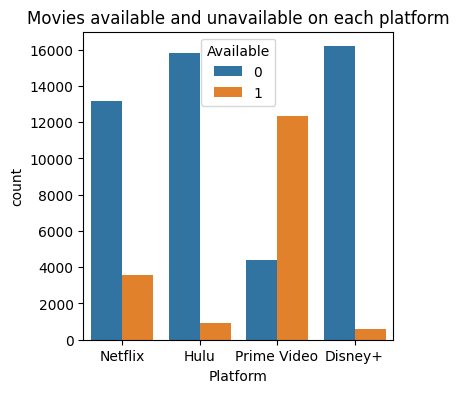

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(platform_df,x="Platform", hue="Available")
plt.title("Movies available and unavailable on each platform")
plt.show()

Observation - Most movies available on Prime video

2. Plot the PLatform wise avg imdb rating

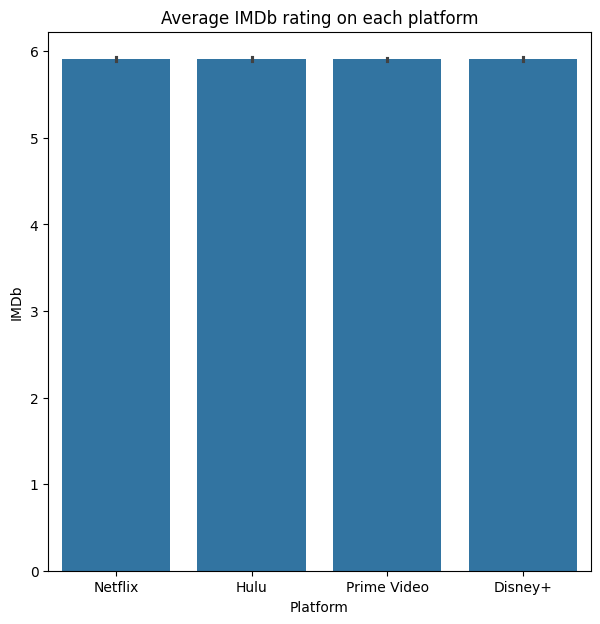

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(platform_df,x="Platform",y="IMDb",estimator='mean')
plt.title("Average IMDb rating on each platform")
plt.show()

Observation - Movies on Disney+ have the highest average IMDb rating

Plot the percentage of each runtime

[9221 7160  363] Index(['Series', 'Long movie', 'Short movie'], dtype='object', name='runtime_category')


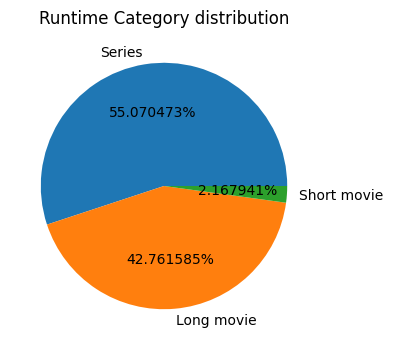

In [ ]:
val = df['runtime_category'].value_counts().values
idx = df['runtime_category'].value_counts().index
print(val,idx)
plt.figure(figsize=(4,4))
plt.pie(data=df,x=val,labels=idx,autopct='%1f%%')
plt.title("Runtime Category distribution")
plt.show()

Observation - Maximum are series

Distribution of runtime

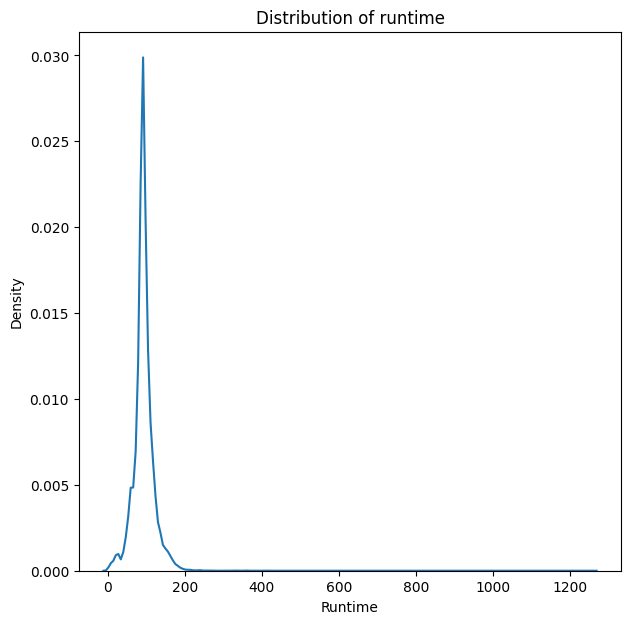

In [ ]:
plt.figure(figsize=(7,7))
sns.kdeplot(df,x="Runtime")
plt.title("Distribution of runtime")
plt.show()

Observation - More movies with approximate 100 runtime

Get the correlation of numerical columns using heat map

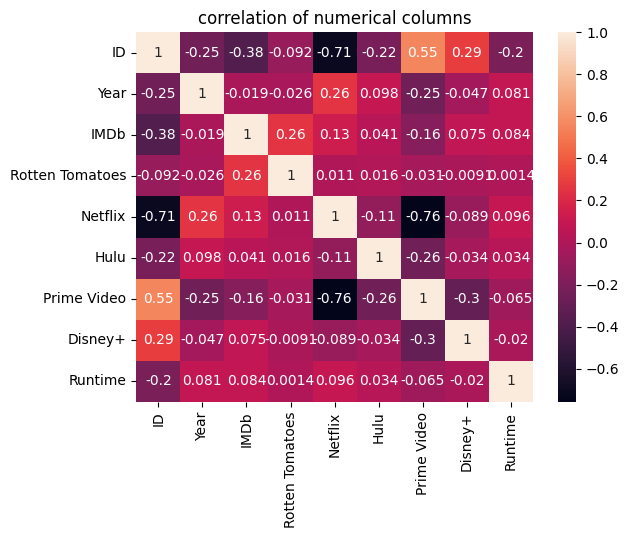

In [ ]:
correlation = df.corr(numeric_only=True)
plt.title('correlation of numerical columns')
sns.heatmap(correlation,annot=True)
plt.show()

Observation - Disney+ and ID have the strogest +ve relation(29%)

Trend of IMDb score across year


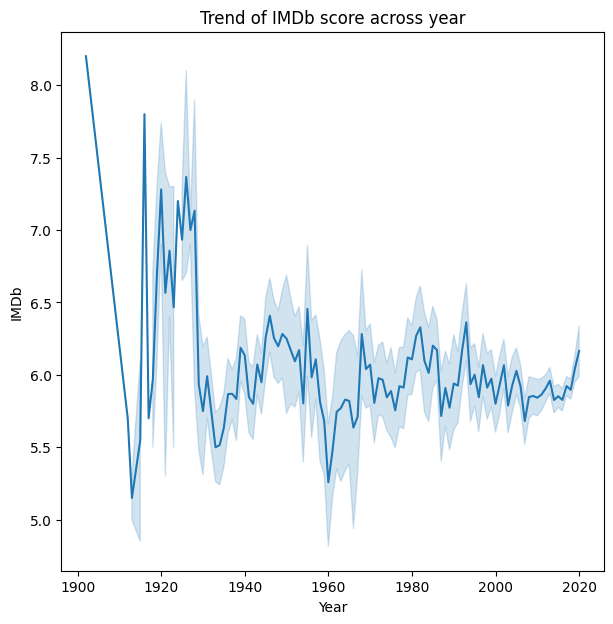

In [ ]:
plt.figure(figsize=(7,7))
sns.lineplot(df,x="Year",y='IMDb')
plt.title("Trend of IMDb score across year")
plt.show()

Observation - Higher IMDb ratings before 1920

Plot the relationship betwen IMDb and Rotten Tomatoes

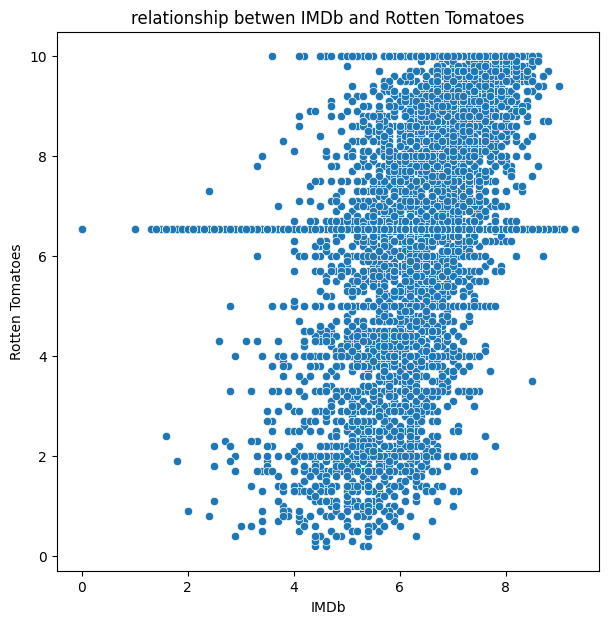

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(df,x="IMDb",y='Rotten Tomatoes')
plt.title("relationship betwen IMDb and Rotten Tomatoes")
plt.show()

Observation - Movies with Rotten Tomatoes 6 have IMDb ratings ranging form approximately 2 to 10

Detect the outliers in IMDb ratings

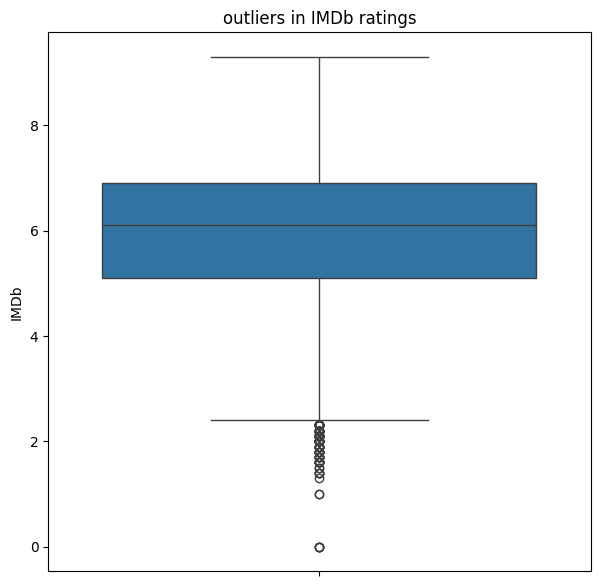

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(df,y="IMDb")
plt.title("outliers in IMDb ratings")
plt.show()

Observation - Lot of Movies with IMDb less than 2